In [2]:
#pip install .

Processing d:\learning\研二上\grs_code
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ------------- -------------------------- 2.9/8.3 MB 17.8 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.3 MB 21.2 MB/s eta 0:00:01
   ---------------------------------------- 8.3/8.3 MB 17.8 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 14.5 MB/s  0:00:00
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   -------------- ------------------------- 4.7/12.9 MB 22.6 MB/s eta 0:00:01
   ------------------------------- -------- 10

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import pandas as pd
import numpy as np

In [2]:
import myutils

In [3]:
#build up a toy dataset
np.random.seed(42)
n_samples = 100
n_snps = 20
snp_df = pd.DataFrame(
        np.random.choice([0, 1, 2], size=(n_samples,n_snps)),
        columns=[f'SNP_{i}' for i in range(n_snps)]
    )
#beta
beta_df=pd.DataFrame({'snp':snp_df.columns,'beta':np.random.randn(n_snps)})
#disease state
y = np.random.choice([0, 1], size=n_samples) # 0: healthy, 1: disease

In [4]:
# Turn beta_df to snp-beta mapping (dictionary)
beta_dict = beta_df.set_index('snp')['beta'].to_dict()
# Get the matrix multiplied by the beta
geno_df=pd.DataFrame()
for i in snp_df.columns:
    geno_df[i] = snp_df[i] * beta_dict[i]

In [5]:
X=geno_df
y=y

In [6]:
#original auc
myutils.evaluate_subset_auc(X, y, cv=5)

np.float64(0.47224242424242424)

In [7]:
#feacture selection
final_selected, final_history= myutils.backward_elimination(X, y,min_features=1, cv=3)

Initial AUC with all features (20 loci): 0.4735
Dropped SNP_3, AUC improved to 0.4971
Dropped SNP_10, AUC improved to 0.5174
Dropped SNP_18, AUC improved to 0.5287
Dropped SNP_2, AUC improved to 0.5433
Dropped SNP_12, AUC improved to 0.5547
Dropped SNP_13, AUC improved to 0.5644
Dropped SNP_7, AUC improved to 0.5667
Dropped SNP_1, AUC improved to 0.5701
Dropped SNP_14, AUC improved to 0.5760
No further AUC improvement by deleting features.


In [8]:
myutils.evaluate_subset_auc(X, y, final_selected, cv=5)

np.float64(0.5689494949494949)

In [9]:
final_grs= geno_df[final_selected].sum(axis=1)
GRS = pd.DataFrame({'Disease':y,'grs':final_grs})

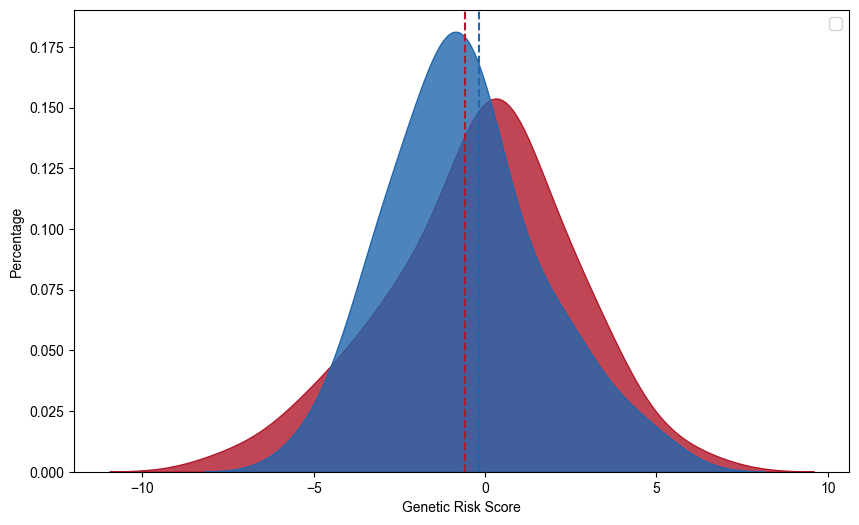

<Axes: xlabel='Genetic Risk Score', ylabel='Percentage'>

In [10]:
myutils.GRS_pic(GRS,model_name='test_model', save_path=None)

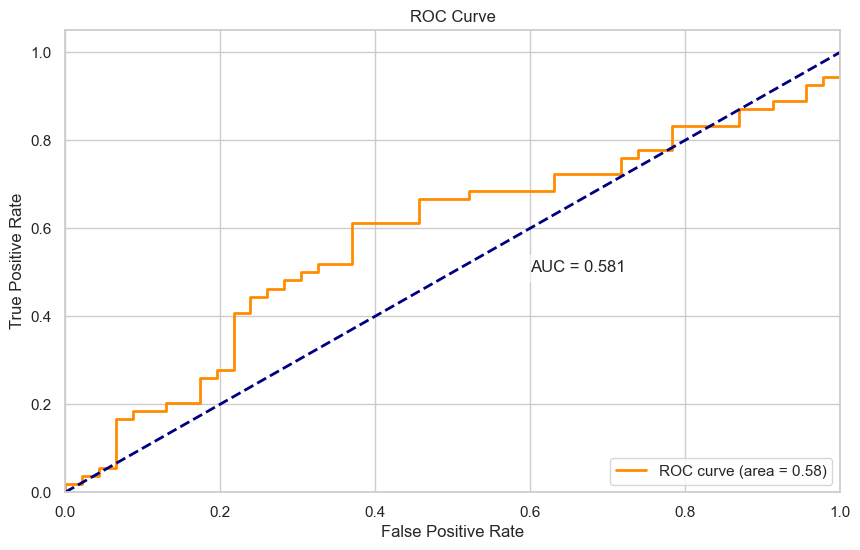

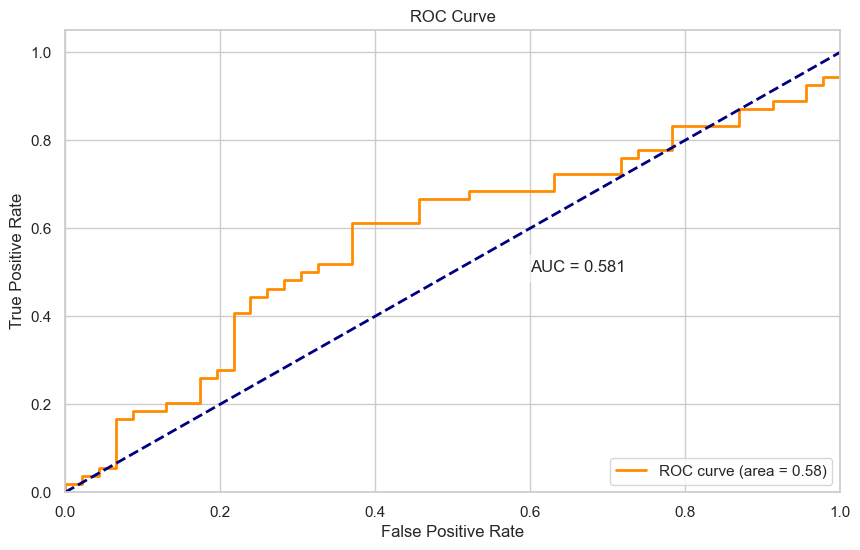

In [11]:
myutils.ROC_pic(GRS,model_name='test_model', save_path=None)